# Decision Tree

In [1]:
# Load our libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Use a nicer style for plots
plt.style.use("seaborn-v0_8-muted")

# Import the regression tree from scikit-learn and a plotting helper
from sklearn.tree import DecisionTreeRegressor, plot_tree
# Import our train_test_split helper
from sklearn.model_selection import train_test_split

## Prepare Dataset into target and features and split them into test train Validation

In [2]:

features_data = pd.read_csv('../../../4 - Data/04_WorkingDatasets/Top50CombLagged/50CombLagged.csv') #Top 50 Feature + comination Features without Lagged Target
target_data = pd.read_csv('../../../4 - Data/04_WorkingDatasets/Top50CombLagged/TargetOutliersTreated.csv')

features_data.tail(10)

,Datum,pm10_stundenmittelwerte_ug_m3,pm2_5_stundenmittelwerte_ug_m3,PM10 [ug/m3],PM2.5 [ug/m3],NO2 [ug/m3],NOX [ug/m3 eq. NO2],no2_stundenmittelwerte_ug_m3,CPC [1/cm3],Basel Wind Direction [10 m],...,Basel Wind Speed [10 m]_x_Hour,Basel Wind Direction [10 m]_x_Basel Wind Direction [10 m],Basel Wind Direction [10 m]_x_Hour,406v_sumLW_x_408n_sumLief,660n_sumPW_x_Gasverbrauch,Gasverbrauch_x_Gasverbrauch,Gasverbrauch_x_Hour,PM10_1h_lag,PM10_2h_lag,PM10_24h_lag
24539,2024-10-19 11:00:00+00:00,-0.737744,-0.749346,-0.346081,-0.320055,-0.781123,-0.595912,-1.023309,-0.808688,0.103516,...,-0.193149,-0.891299,0.077697,-0.563230,-1.090158,-0.362200,-0.592623,-0.532504,-0.297281,-0.371916
24540,2024-10-19 12:00:00+00:00,-0.837208,-0.918920,-0.539055,-0.491971,-0.853593,-0.689768,-0.940082,-1.007878,0.287639,...,-0.607000,-0.822287,0.255062,-0.560406,-0.253743,-0.339461,-0.670354,-0.576585,-0.532492,-0.477674
24541,2024-10-19 13:00:00+00:00,-0.872483,-0.992216,-0.686624,-0.606582,-0.917004,-0.764852,-0.877662,-1.059252,0.154800,...,-0.775058,-0.878230,0.144771,-0.514032,-0.358548,-0.329900,-0.736084,-0.609584,-0.576573,-0.502646
24542,2024-10-19 14:00:00+00:00,-0.685577,-0.946253,-0.618515,-0.692540,-0.926063,-0.783623,-0.606067,-1.060710,-0.122968,...,-0.665063,-0.892194,-0.137979,-0.438105,-0.545229,-0.385836,-0.719965,-0.593864,-0.609572,-0.423335
24543,2024-10-19 15:00:00+00:00,-0.716082,-0.798709,-0.527703,-0.678213,-0.898887,-0.764852,-0.395143,-0.845031,-0.339880,...,-1.008301,-0.806183,-0.391169,-0.468502,-0.966932,-0.468171,-0.642886,-0.554180,-0.593852,-0.095974
24544,2024-10-19 16:00:00+00:00,-0.404773,-0.469487,-0.482298,-0.577929,-0.609008,-0.558370,0.359611,-0.245979,-0.273198,...,-0.914987,-0.841672,-0.334219,-0.330645,-0.744906,-0.527143,-0.570088,-0.223545,-0.554168,-0.210796
24545,2024-10-19 17:00:00+00:00,0.023787,-0.108854,-0.266621,-0.305729,0.151925,-0.039036,0.885725,0.452545,-0.209278,...,-1.162907,-0.868151,-0.271354,-0.122155,0.167454,-0.522496,-0.616499,0.336329,-0.223532,-0.203787
24546,2024-10-19 18:00:00+00:00,-0.000954,-0.103414,-0.005538,-0.076508,0.622978,0.286330,0.765664,1.144091,-0.031366,...,-1.341916,-0.902991,-0.046348,-0.192074,0.736670,-0.489125,-0.727713,0.408429,0.336343,-0.222235
24547,2024-10-19 19:00:00+00:00,-0.077068,-0.202140,0.244194,0.152713,0.885681,0.480299,-0.014386,1.107367,-0.076264,...,-1.270318,-0.899593,-0.111200,-0.052237,0.230290,-0.375189,-0.992467,0.507488,0.408443,-0.232518
24548,2024-10-19 20:00:00+00:00,-0.058586,-0.250823,0.210139,0.210018,0.478039,0.223760,-0.046965,0.870196,-0.163207,...,-0.865419,-0.882659,-0.244816,-0.315090,0.104526,-0.256195,-1.244850,0.342302,0.507503,-0.010410


In [3]:
# Konvertiere die Datumsspalte in einen datetime-Index (falls nicht bereits)
target_data['Datum'] = pd.to_datetime(target_data['Datum'])

# Definiere das Cut-Off-Datum
#cutoff_date = pd.Timestamp('2024-10-20 21:00:00+00:00')

# Filtere das Dataset auf Einträge bis einschließlich des Cut-Off-Datums
#target_data_cutted = target_data[target_data['Datum'] <= cutoff_date]


# Split our data intro features and targets
# Teile das Dataset in Features und Zielvariable
y = target_data["PM10_Combined_Trend_Residual"]  # Zielvariable
X = features_data.drop(columns=["Datum"])  # Alle Spalten außer der Zielvariable

X.head(10)

# Daten splitten
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=11) # letter K in Alphabet
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.125, random_state=11)  # 10% von Gesamt  # letter K in Alphabet

print("Train Size:", len(X_train))
print("Validation Size:", len(X_val))
print("Test Size:", len(X_test))

Train Size: 17184
Validation Size: 2455
Test Size: 4910


## Decision Tree Regressor

In [4]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.tree import DecisionTreeRegressor

np.random.seed(11)

# Expanding Cross-Validation (5 Splits)
tscv = TimeSeriesSplit(n_splits=5)
results = []

# Use the initial 50% of the data for training (optional, but keeps your requirement in mind)
train_size = int(0.5 * len(X_train))
X_train_init = X_train.iloc[:train_size]
y_train_init = y_train.iloc[:train_size]

# Perform expanding window cross-validation
for fold, (train_index, val_index) in enumerate(tscv.split(X_train_init)):
    # Expanding training data with each fold
    X_train_fold = X_train_init.iloc[train_index]
    y_train_fold = y_train_init.iloc[train_index]
    
    # Validation data stays fixed (next chunk after the training data)
    X_val_fold = X_train_init.iloc[val_index]
    y_val_fold = y_train_init.iloc[val_index]
    
    # Train the model
    model = DecisionTreeRegressor()
    model.fit(X_train_fold, y_train_fold)
    
    # Predict and calculate MSE
    y_pred = model.predict(X_val_fold)
    mse = mean_squared_error(y_val_fold, y_pred)
    results.append(mse)
    print(f"Fold {fold + 1}: MSE = {mse}")

# Average MSE across all folds
average_mse = np.mean(results)
print(f"Durchschnittlicher MSE über alle Folds: {average_mse}")

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate the MSE for the test set
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE: {test_mse}")

Fold 1: MSE = 19.612386279947025
Fold 2: MSE = 13.999116158534257
Fold 3: MSE = 9.956794883985024
Fold 4: MSE = 14.130319949207665
Fold 5: MSE = 9.936444447876864
Durchschnittlicher MSE über alle Folds: 13.527012343910167
Test MSE: 13.793854948789601


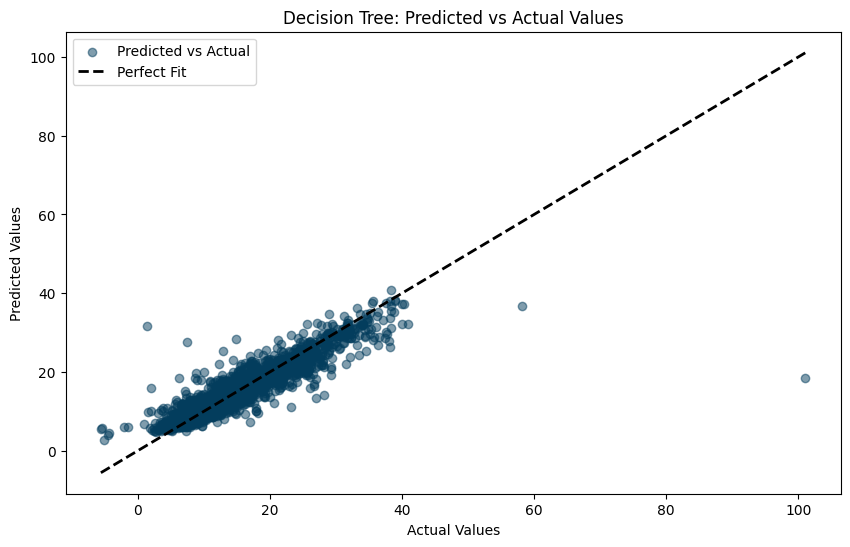

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Scatter plot of predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5, label="Predicted vs Actual", color='#033D5D')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="Perfect Fit")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree: Predicted vs Actual Values')
plt.legend()

# Save the plot as an image
plt.savefig('Decision_Tree_predicted_vs_actual.png', dpi=300, bbox_inches='tight')  # Export the plot

# Show the plot
plt.show()


In [5]:
model.tree_.node_count

14319

## Use ccp_alpha (and other parameters) to optimize the Decision Tree for example when it comes to overfitting

[`DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

## Crossvalidation to find best alpha 

 Geht nicht mit so vielen Features

In [6]:
# Import our tools for model selection
from sklearn.model_selection import cross_validate, KFold

In [7]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeRegressor
import numpy as np

np.random.seed(11)

# Definiere die Werte für ccp_alpha (Cost Complexity Pruning)
alphas = np.logspace(-4, 0, 50)  # Werte zwischen 10^-4 und 10^0

# Initialisiere Cross-Validation
cv = KFold(n_splits=5, shuffle=True, random_state=11)

# Speicher für Ergebnisse
scores = []  # Durchschnittliche MSE für jedes ccp_alpha
scores_std = []  # Standardabweichung der Scores für Stabilitätsanalyse

# Cross-Validation für jedes ccp_alpha
for alpha in alphas:
    # Decision Tree mit aktuellem ccp_alpha-Wert
    tree_cv = DecisionTreeRegressor(ccp_alpha=alpha, random_state=11)
    
    # Negative MSE, da cross_val_score maximiert; wir wollen minimieren
    mse_scores = cross_val_score(tree_cv, X_train, y_train, cv=cv, scoring="neg_mean_squared_error")
    
    # Durchschnittlichen MSE speichern (negativ, daher multiplizieren mit -1)
    scores.append(-mse_scores.mean())
    scores_std.append(mse_scores.std())

# Optimiere ccp_alpha: Der Wert mit dem niedrigsten MSE
optimal_alpha = alphas[np.argmin(scores)]

print(f"Optimales ccp_alpha: {optimal_alpha}")

Optimales ccp_alpha: 0.009102981779915217


In [8]:
np.random.seed(11)

# Expanding Cross Validation mit 5 Folds
tscv = TimeSeriesSplit(n_splits=5)

# Liste zur Speicherung der Ergebnisse
results_ccp = []

# Use the initial 50% of the data for training (optional, but keeps your requirement in mind)
train_size = int(0.5 * len(X_train))
X_train_init = X_train.iloc[:train_size]
y_train_init = y_train.iloc[:train_size]

# Perform expanding window cross-validation
for fold, (train_index, val_index) in enumerate(tscv.split(X_train_init)):
    # Expanding training data with each fold
    X_train_fold = X_train_init.iloc[train_index]
    y_train_fold = y_train_init.iloc[train_index]
    
    # Validation data stays fixed (next chunk after the training data)
    X_val_fold = X_train_init.iloc[val_index]
    y_val_fold = y_train_init.iloc[val_index]
    
    # Modell trainieren
    tree_ccp = DecisionTreeRegressor(ccp_alpha=optimal_alpha)
    tree_ccp.fit(X_train_fold, y_train_fold)
    
    # Vorhersagen machen
    y_pred_ccp = tree_ccp.predict(X_val_fold)
    
    # Berechne den Fehler
    mse_ccp = mean_squared_error(y_val_fold, y_pred_ccp)
    results_ccp.append(mse_ccp)
    
    print(f"Fold {fold + 1}: MSE = {mse_ccp}")

# Durchschnittlichen Fehler über alle Folds berechnen
average_mse_ccp = np.mean(results_ccp)
print(f"Durchschnittlicher MSE über alle Folds: {average_mse_ccp}")

# Make predictions on the test set
y_test_pred = tree_ccp.predict(X_test)

# Calculate the MSE for the test set
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE: {test_mse}")


Fold 1: MSE = 18.229380919425047
Fold 2: MSE = 12.427822119106711
Fold 3: MSE = 7.689998953489046
Fold 4: MSE = 10.936383281999415
Fold 5: MSE = 6.640599118078455
Durchschnittlicher MSE über alle Folds: 11.184836878419736
Test MSE: 10.792410838705042


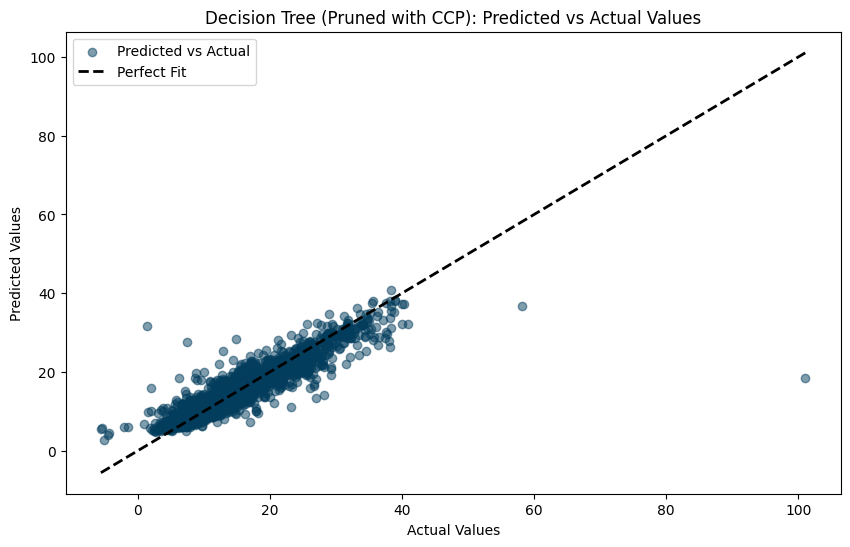

In [16]:
# plot the ccp_alpha values
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Scatter plot of predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5, label="Predicted vs Actual", color='#033D5D')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="Perfect Fit")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree (Pruned with CCP): Predicted vs Actual Values')
plt.legend()

# Save the plot as an image
plt.savefig('Decision_Tree_CCP_predicted_vs_actual.png', dpi=300, bbox_inches='tight')  # Export the plot

# Show the plot
plt.show()


In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Hyperparameter-Raster definieren
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'ccp_alpha': [0.001, 0.01, 0.1]
}

# GridSearchCV initialisieren
grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)

# GridSearchCV ausführen, um die optimalen Parameter zu finden
grid_search.fit(X_train, y_train)

# Beste Parameter aus GridSearchCV
optimal_params = grid_search.best_params_

# Optimalen Parameter-Werte explizit definieren
optimal_ccp_alpha = optimal_params['ccp_alpha']
optimal_max_depth = optimal_params['max_depth']
optimal_min_samples_split = optimal_params['min_samples_split']
optimal_min_samples_leaf = optimal_params['min_samples_leaf']

# Die optimalen Werte sind jetzt:
print(f"Optimale Parameter: {optimal_params}")

# Sie können diese optimalen Werte direkt in den nächsten Code-Block (z. B. das Training und Testen des Modells) übernehmen.

Optimale Parameter: {'ccp_alpha': 0.001, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [10]:
# Set a seed for reproducibility
np.random.seed(11)

# Expanding Cross Validation mit 5 Folds
tscv = TimeSeriesSplit(n_splits=5)

# Liste zur Speicherung der Ergebnisse
results_ccp = []

# Use the initial 50% of the data for training (optional, but keeps your requirement in mind)
train_size = int(0.5 * len(X_train))
X_train_init = X_train.iloc[:train_size]
y_train_init = y_train.iloc[:train_size]

# Test-Dataset festlegen (z. B. die letzten 20% der Daten)
test_size = int(0.2 * len(X_train))
X_test = X_train.iloc[-test_size:]
y_test = y_train.iloc[-test_size:]

# Perform expanding window cross-validation
for fold, (train_index, val_index) in enumerate(tscv.split(X_train_init)):
    # Expanding training data with each fold
    X_train_fold = X_train_init.iloc[train_index]
    y_train_fold = y_train_init.iloc[train_index]
    
    # Validation data stays fixed (next chunk after the training data)
    X_val_fold = X_train_init.iloc[val_index]
    y_val_fold = y_train_init.iloc[val_index]
    
    # Modell trainieren with multiple hyperparameters
    tree_ccp = DecisionTreeRegressor(
        ccp_alpha=optimal_alpha,
        max_depth=optimal_max_depth,
        min_samples_split=optimal_min_samples_split,
        min_samples_leaf=optimal_min_samples_leaf,
    )
    tree_ccp.fit(X_train_fold, y_train_fold)
    
    # Vorhersagen machen
    y_pred_ccp = tree_ccp.predict(X_val_fold)
    
    # Berechne den MSE für das Validation-Set
    mse_ccp = mean_squared_error(y_val_fold, y_pred_ccp)
    results_ccp.append(mse_ccp)
    
    print(f"Fold {fold + 1}: Validation MSE = {mse_ccp}")

# Durchschnittlichen Fehler über alle Folds berechnen
average_mse_ccp = np.mean(results_ccp)
print(f"Durchschnittlicher Validation-MSE über alle Folds: {average_mse_ccp}")


# Vorhersagen für das Test-Set machen
y_test_pred = tree_ccp.predict(X_test)

# Berechne den Test-MSE
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test-MSE: {test_mse}")

Fold 1: Validation MSE = 13.323488443046385
Fold 2: Validation MSE = 9.491242479479633
Fold 3: Validation MSE = 5.737134710600216
Fold 4: Validation MSE = 7.3976796170981745
Fold 5: Validation MSE = 5.3758831789942
Durchschnittlicher Validation-MSE über alle Folds: 8.265085685843722
Test-MSE: 8.124969971276997


In [11]:
tree_ccp.tree_.node_count

57

## Bagging

Bagging (Bootstrap Aggregating) ist eine Technik, um die Stabilität und Genauigkeit von Machine-Learning-Algorithmen zu verbessern, insbesondere bei Modellen wie Entscheidungsbäumen, die anfällig für hohe Varianz sind. Es basiert auf dem Bootstrapping-Prinzip, bei dem mehrere Trainingssets durch Zufallsstichproben mit Zurücklegen erzeugt werden.

Jeder Baum wird auf einem dieser zufälligen Datensets trainiert, und die Vorhersagen der B Modelle werden durch Mittelung kombiniert. Mathematisch reduziert Bagging die Varianz der Modelle, weil unabhängige Fehler über die Modelle hinweg geglättet werden. So wird die Vorhersage insgesamt stabiler und robuster gegen Variationen in den Trainingsdaten.

Das Ziel ist, Vorhersagefehler durch Mittelung der Outputs der individuellen Modelle zu minimieren, was insgesamt zu einer besseren Modellleistung führt.

In [12]:
# Import the regression tree from scikit-learn and a plotting helper
from sklearn.tree import DecisionTreeRegressor, plot_tree
# Import our train_test_split helper
from sklearn.model_selection import train_test_split
# Import the mean_squared_error function under the alias mse
from sklearn.metrics import mean_squared_error as mse
# Import the resampling helper
from sklearn.utils import resample
# Import the sklearn implementation of bagging
from sklearn.ensemble import BaggingRegressor

np.random.seed(11)

# Expanding Cross Validation mit 5 Folds
tscv = TimeSeriesSplit(n_splits=5)

# Liste zur Speicherung der Ergebnisse
results_bag = []

# Use the initial 50% of the data for training (optional, but keeps your requirement in mind)
train_size = int(0.5 * len(X_train))
X_train_init = X_train.iloc[:train_size]
y_train_init = y_train.iloc[:train_size]

# Perform expanding window cross-validation
for fold, (train_index, val_index) in enumerate(tscv.split(X_train_init)):
    # Expanding training data with each fold
    X_train_fold = X_train_init.iloc[train_index]
    y_train_fold = y_train_init.iloc[train_index]
    
    # Validation data stays fixed (next chunk after the training data)
    X_val_fold = X_train_init.iloc[val_index]
    y_val_fold = y_train_init.iloc[val_index]

    # Create a bagged tree estimator with B=100 trees
    bagged_trees = BaggingRegressor(DecisionTreeRegressor(), n_estimators=100)
    
    # Modell trainieren
    bagged_trees.fit(X_train_fold, y_train_fold)
    
    # Vorhersagen machen
    y_pred = bagged_trees.predict(X_val_fold)
    
    # Berechne den Fehler
    mse = mean_squared_error(y_val_fold, y_pred)
    results_bag.append(mse)
    
    print(f"Fold {fold + 1}: MSE = {mse}")

# Durchschnittlichen Fehler über alle Folds berechnen
average_mse_bag = np.mean(results_bag)
print(f"Durchschnittlicher MSE über alle Folds: {average_mse_bag}")


# Make predictions on the test set
y_test_pred = bagged_trees.predict(X_test)

# Calculate the MSE for the test set
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE: {test_mse}")

Fold 1: MSE = 9.542377214577066
Fold 2: MSE = 7.529897277855571
Fold 3: MSE = 5.535457956880826
Fold 4: MSE = 8.058688656636866
Fold 5: MSE = 4.7860444260223165
Durchschnittlicher MSE über alle Folds: 7.090493106394528
Test MSE: 7.563452770621601


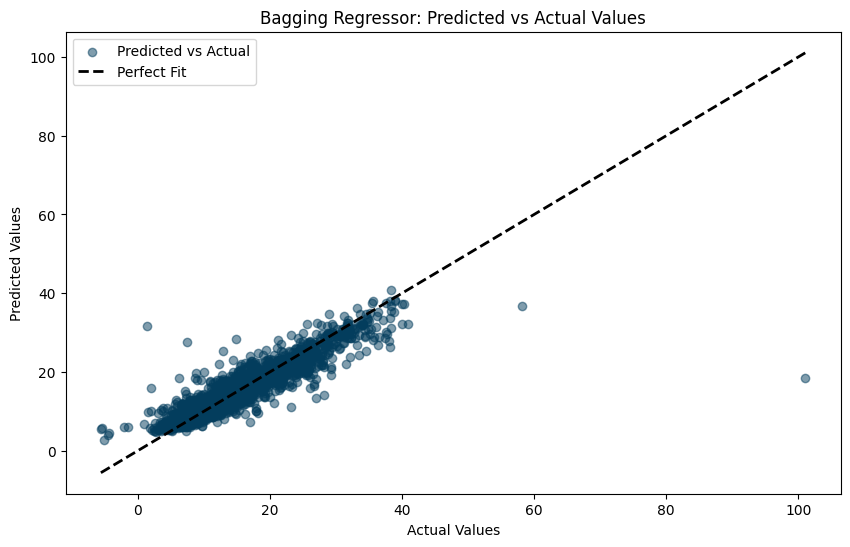

In [20]:
### Plot the predicted vs actual values

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Scatter plot of predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5, label="Predicted vs Actual", color='#033D5D')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="Perfect Fit")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Bagging Regressor: Predicted vs Actual Values')
plt.legend()

# Save the plot as an image
plt.savefig('Bagging_Regressor_predicted_vs_actual.png', dpi=300, bbox_inches='tight')  # Export the plot

# Show the plot
plt.show()


## Random Forrest

Random Forests erweitern Bagging, indem sie jedem Baum eine zusätzliche Zufallskomponente hinzufügen. Jeder Baum wird mit einem bootstrap-Sample der Trainingsdaten trainiert, wobei nur ein zufälliger Teil der Features für die Konstruktion des Baums verwendet wird. Dadurch unterscheidet sich Random Forests von klassischem Bagging, bei dem alle Features verfügbar sind.

Die zufällige Auswahl der Features reduziert die Korrelation zwischen den Bäumen und verbessert die Generalisierung des Modells. Üblicherweise wird die Anzahl der verwendeten Features  m  so gewählt, dass  m \approx \sqrt{p} , wobei  p  die Gesamtzahl der Features ist. Wenn  m = p  gesetzt wird, ist Random Forest gleichbedeutend mit einem Bagging-Modell.

In [13]:
# Import the random forest regressor
from sklearn.ensemble import RandomForestRegressor

np.random.seed(11)

# Expanding Cross Validation mit 5 Folds
tscv = TimeSeriesSplit(n_splits=5)

# Liste zur Speicherung der Ergebnisse
results_rf = []

# Use the initial 50% of the data for training (optional, but keeps your requirement in mind)
train_size = int(0.5 * len(X_train))
X_train_init = X_train.iloc[:train_size]
y_train_init = y_train.iloc[:train_size]

# Perform expanding window cross-validation
for fold, (train_index, val_index) in enumerate(tscv.split(X_train_init)):
    X_train_fold, X_val_fold = X_train_init.iloc[train_index], X_train_init.iloc[val_index]
    y_train_fold, y_val_fold = y_train_init.iloc[train_index], y_train_init.iloc[val_index]

    # Initialize the random forest regressor
    rf = RandomForestRegressor(n_estimators=100, max_features="sqrt")
    
    # Modell trainieren
    rf.fit(X_train_fold, y_train_fold)
    
    # Vorhersagen machen
    y_pred = rf.predict(X_val_fold)
    
    # Berechne den Fehler
    fold_mse = mean_squared_error(y_val_fold, y_pred)
    results_rf.append(fold_mse)
    
    print(f"Fold {fold + 1}: MSE = {fold_mse}")

# Durchschnittlichen Fehler über alle Folds berechnen
average_mse_rf = np.mean(results_rf)
print(f"Durchschnittlicher MSE über alle Folds: {average_mse_rf}")

# Make predictions on the test set
y_test_pred = rf.predict(X_test)

# Calculate the MSE for the test set
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE: {test_mse}")

Fold 1: MSE = 7.566053122696185
Fold 2: MSE = 9.242429183135267
Fold 3: MSE = 8.622285158182153
Fold 4: MSE = 13.878403525678186
Fold 5: MSE = 5.073821410478249
Durchschnittlicher MSE über alle Folds: 8.876598480034009
Test MSE: 7.708841438013446


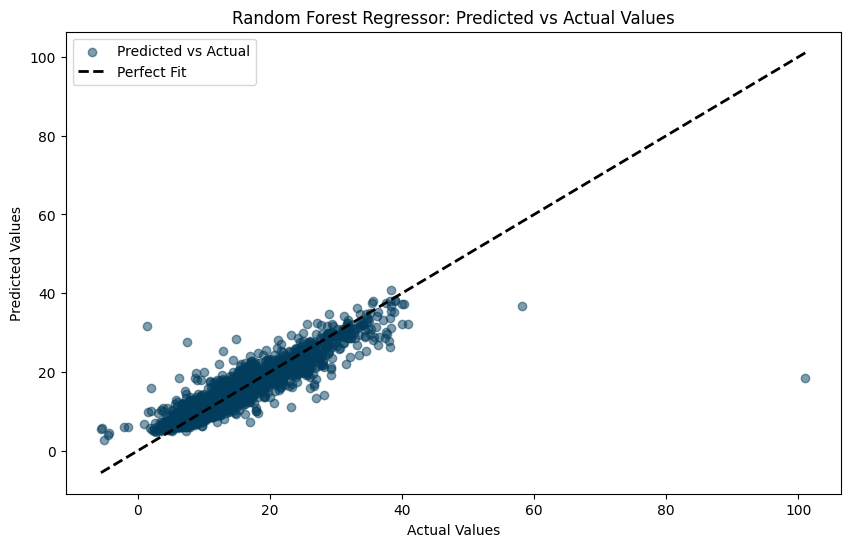

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Scatter plot of predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5, label="Predicted vs Actual", color='#033D5D')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="Perfect Fit")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regressor: Predicted vs Actual Values')
plt.legend()

# Save the plot as an image
plt.savefig('Random_Forest_predicted_vs_actual.png', dpi=300, bbox_inches='tight')  # Export the plot

# Show the plot
plt.show()


In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Hyperparameter-Raster definieren
param_grid_rf = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'n_estimators': [50, 100, 200],  # Anzahl der Bäume für den Random Forest
    'max_features': ['sqrt', 'log2']  # Auswahl der Merkmale pro Split
}

# GridSearchCV initialisieren
grid_search_rf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=11),
    param_grid=param_grid_rf,
    scoring='neg_mean_squared_error',  # Maximierung des negativen MSE
    cv=5,  # 5-Fold Cross-Validation
    n_jobs=-1
)

# GridSearchCV ausführen, um die optimalen Parameter zu finden
grid_search_rf.fit(X_train, y_train)

# Beste Parameter aus GridSearchCV
optimal_params_rf = grid_search_rf.best_params_

# Optimalen Parameter-Werte explizit definieren
optimal_max_depth = optimal_params_rf['max_depth']
optimal_min_samples_split = optimal_params_rf['min_samples_split']
optimal_min_samples_leaf = optimal_params_rf['min_samples_leaf']
optimal_n_estimators = optimal_params_rf['n_estimators']
optimal_max_features = optimal_params_rf['max_features']

# Die optimalen Werte sind jetzt:
print(f"Optimale Parameter für Random Forest: {optimal_params_rf}")

# --- Modelltraining mit den optimalen Hyperparametern ---
np.random.seed(11)

# Expanding Cross Validation mit 5 Folds
tscv = TimeSeriesSplit(n_splits=5)

# Liste zur Speicherung der Ergebnisse
results_rf = []

# Perform expanding window cross-validation
for fold, (train_index, val_index) in enumerate(tscv.split(X_train_init)):
    X_train_fold, X_val_fold = X_train_init.iloc[train_index], X_train_init.iloc[val_index]
    y_train_fold, y_val_fold = y_train_init.iloc[train_index], y_train_init.iloc[val_index]

    # Initialize the random forest regressor mit optimalen Hyperparametern
    rf = RandomForestRegressor(
        n_estimators=optimal_n_estimators,
        max_depth=optimal_max_depth,
        min_samples_split=optimal_min_samples_split,
        min_samples_leaf=optimal_min_samples_leaf,
        max_features=optimal_max_features,
        random_state=11
    )
    
    # Modell trainieren
    rf.fit(X_train_fold, y_train_fold)
    
    # Vorhersagen machen
    y_pred = rf.predict(X_val_fold)
    
    # Berechne den Fehler
    fold_mse = mean_squared_error(y_val_fold, y_pred)
    results_rf.append(fold_mse)
    
    print(f"Fold {fold + 1}: MSE = {fold_mse}")

# Durchschnittlichen Fehler über alle Folds berechnen
average_mse_rf = np.mean(results_rf)
print(f"Durchschnittlicher Validation-MSE über alle Folds: {average_mse_rf}")

# Vorhersagen für das Test-Set machen
y_test_pred = rf.predict(X_test)

# Berechne den Test-MSE
test_mse_rf = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE for Random Forest: {test_mse_rf}")

Optimale Parameter für Random Forest: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Fold 1: MSE = 7.596367675410509
Fold 2: MSE = 9.629892236371285
Fold 3: MSE = 8.07941880338551
Fold 4: MSE = 14.389516839108277
Fold 5: MSE = 5.105542892946096
Durchschnittlicher Validation-MSE über alle Folds: 8.960147689444335
Test MSE for Random Forest: 7.628098801878877
